### Torus Geometry
- **Triangular unit cell**: Primitive vectors |G₁|=|G₂| with 120 degree in between
- **Landau level**: n = 0 (lowest Landau level)
- **Brillouin zone area**: 2π/l² = √0.75 × G²
- **Magnetic length**: l = √(ℏ/eB) sets the length scale

### Filling Factor
- **ν**: Filling factor 1/3 (or 1/5, 2/5, etc.) (Laughlin state)
- **Nk**: Number of k-points must be multiple of denominator for commensurability
- **Ne = Nk * ν**: Number of electrons

### Interaction Details
- **Coulomb Interaction**: V(q) = W₀ × 1/|ql|
- **Gate Screening**: tanh(qD) (finite gate distace)
- **Landau level projection**: exp(-0.5 × q²l²) level form factor
- **Form Factor**: See arXiv.2509.07784 Eq.(A28)
- **Units**: Energy in units of W₀ = e²/ϵl

### Key Physics
- **Periodic boundary conditions**: Torus geometry
- **Momentum conservation**: Total momentum K = (K₁, K₂) is conserved
- **Ground state degeneracy**: 3-fold degenerate on torus for 1/3-filling Laughlin states

In [1]:
# These packages are not included in the MomentumED package. 
# Use the following line to add them:
# using Pkg; Pkg.add("CairoMakie"); Pkg.add("QuadGK"); Pkg.add("ClassicalOrthogonalPolynomials")

# Import the momentum-conserved exact diagonalization package
using MomentumED, LinearAlgebra
include("../Landau level torus.jl")
using .LLT

# square/triangular lattice
sqa_lattice = ReciprocalLattice(:square);          # == ReciprocalLattice(1, 0)
tri_lattice = ReciprocalLattice(:triangular);      # == ReciprocalLattice(1, -1//2)
# general_lattice = ReciprocalLattice(abs(G2/G1), cos(θ))
# use exact values, Integer or Rational, to avoid uncertainty on Brillouin Zone boundary.

using CairoMakie # for plotting
CairoMakie.activate!()

# Plot the energy spectrum
function plot_ed_spectrum(energies, ss_k1, ss_k2; 
    title = nothing, ylims = (nothing, nothing),
    ylabel = "Energy per unit cell (W₀ = e²/ϵl)",
)
    fig = Figure();
    ax = Axis(fig[1, 1];
        xlabel = "$(Gk[2])k1+k2",
        ylabel = ylabel
    )
    ax_top = Axis(fig[1, 1];
        xaxisposition = :top
    )
    top_ticks = ([], [])
    hidespines!(ax_top)
    hidexdecorations!(ax_top; label = false, ticklabels = false)
    hideydecorations!(ax_top)
    linkxaxes!(ax, ax_top)

    # Plot energy levels for each momentum block
    for i in 1:length(ss_k1)
        x = Gk[2] * ss_k1[i] + ss_k2[i]
        push!(top_ticks[1], x)
        push!(top_ticks[2], string(i))
        if isassigned(energies,i)
            for e in energies[i]
                scatter!(ax, x, e/Nk/LLT.W0, color = :blue, marker=:hline)
            end
        end
    end
    ylims!(ax, ylims...)
    ax_top.xticks = top_ticks
    if title isa String
        ax_top.subtitle = title
    end
    display(fig)
    fig
end

function plot_entanglement_spectrum(;title=nothing, ylims = (nothing, nothing))
    fig = Figure();
    ax = Axis(fig[1,1];
        xlabel = "Ne in A-part",
        xticksvisible = false,
        xgridvisible = false,
        xminorgridvisible = true,
    )

    x = 0
    NA_lines = Float64[-0.5;]
    xtickposition = Float64[];
    xticklabel = String[];
    for indexNA in CartesianIndices(entanglement_spectrum)
        x_begin = x
        for (indexkA, spectrum) in enumerate(entanglement_spectrum[indexNA])
            if !isempty(spectrum)
                for e in spectrum
                    scatter!(ax, x, e, color = :blue, marker=:hline)
                end
                x += 1
            end
        end
        x_end = x
        if x_end > x_begin
            NA = string(indexNA[1]-1)
            for i in 2:length(indexNA)
                NA *= ",$(indexNA[i]-1)"
            end
            push!(xtickposition, 0.5(x_begin+x_end-1))
            push!(xticklabel, NA)
            push!(NA_lines, x-0.5)
        end
    end
    ax.xticks = (xtickposition, xticklabel)
    ax.xminorticks = NA_lines
    if title isa String
        ax.subtitle = title
    end
    ylims!(ax, ylims...)
    display(fig)
    fig
end

plot_entanglement_spectrum (generic function with 1 method)

In [2]:
# Define 3×5 k-mesh (Nk=15) for 1/3 filling Laughlin state calculation
k_list = [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2;
          0 0 0 1 1 1 2 2 2 3 3 3 4 4 4]

# System parameters
Nk = 15         # Total number of k-points
Gk = (3, 5)     # Grid dimensions (G1_direction, G2_direction)
Ne = 5          # Ne electrons for this system, Ne=5 for 1/3 filling, Ne=3 for 1/5 filling

5

In [3]:
# Define 3×6 k-mesh (Nk=18) for 1/3 filling Laughlin state calculation
# the three ground states will have the same total momentum

#=

k_list = [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2;
          0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5]

# System parameters
Nk = 18         # Total number of k-points
Gk = (3, 6)     # Grid dimensions (G1_direction, G2_direction)
Ne = 6          # Ne electrons for this system

=#

In [25]:
# Define 4×6 k-mesh (Nk=24) for 1/3 filling Laughlin state calculation
# the three ground states will have the same total momentum

#

k_list = [0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3;
          0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5]

# System parameters
Nk = 24         # Total number of k-points
Gk = (4, 6)     # Grid dimensions (G1_direction, G2_direction)
Ne = 8          # Ne electrons for this system

#

8

In [5]:
# Define 9×9 k-mesh (Nk=27) for accurate Laughlin state calculation
# the three ground states will have the same total momentum
# Note: This setup needs more time and memory

#=

k_list = [0 3 6 2 5 8 1 4 7 0 3 6 2 5 8 1 4 7 0 3 6 2 5 8 1 4 7;
          0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8]

# System parameters
Nk = 27          # Total number of k-points
Gk = (9, 9)      # Grid dimensions (G1_direction, G2_direction)
# Number of electrons for 1/3 filling
Ne = 9          # N electrons for this system

=#

In [6]:
# Define 6×5 k-mesh (Nk=30) for accurate Laughlin state calculation
# Note: This setup needs more time and memory
# Note: 32GB memory is recommended

#=

k_list = [0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5;
          0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4]

# System parameters
Nk = 30         # Total number of k-points
Gk = (6, 5)      # Grid dimensions (G1_direction, G2_direction)
Ne = 10         # N electrons for this system

=#

In [26]:
# Set up component parameters: (layer, level, Chern number, pseudospin)
sys_int = LandauInteraction(tri_lattice, (1, 0, 1, 0));

# Coulomb
sys_int.D_l = 10.0                  # Screening length D/l
# compute the pseudo-potential components
intra_PP = LLT.pseudo_potential_decomposition.(0:10; D_l = sys_int.D_l, d_l = 0.0)
@show intra_PP

# Haldane pseudo-potential
sys_int.V_intra = [0.0; 1.0; 0.0; 0.0]          # Intralayer Haldane pseudo-potential in unit of W0

# choose a linear mixing between Haldane and Coulomb interaction
sys_int.mix = 1                  # mix * Haldane + (1-mix) * Coulomb

# Create parameter structure for bilayer system
para = EDPara(k_list = k_list, Gk = Gk, V_int = sys_int);

intra_PP = [1.634711735356748, 0.749358256026894, 0.5286614325145934, 0.41872976155450814, 0.3503270791671362, 0.3026827462193143, 0.2671424975972047, 0.23937933875941908, 0.21695945116067117, 0.1983956001259201, 0.18272116857187637]


In [27]:
# Create momentum blocks (Hilbert subspace)
subspaces, ss_k1, ss_k2 = ED_momentum_subspaces(para, (Ne, ));
display(length.(subspaces))

# one-body terms are all zero in flat Landau level
scat = ED_sortedScatterList_twobody(para);

24-element Vector{Int64}:
 30709
 30624
 30709
 30624
 30709
 30624
 30624
 30624
 30624
 30624
     ⋮
 30624
 30704
 30624
 30624
 30624
 30624
 30624
 30624
 30624

In [28]:
Neigen = 10  # Number of eigenvalues to compute per subspace
energies = Vector{Vector{Float64}}(undef, length(subspaces));
vectors = Vector{Vector{<:MBS64Vector}}(undef, length(subspaces));
for i in eachindex(subspaces)
    println("Processing subspace #$i with size $(length(subspaces[i])), momentum $(ss_k1[i]), $(ss_k2[i])")
    energies[i], vectors[i] = EDsolve(subspaces[i], scat;
        N = Neigen, showtime = true, ishermitian = true
    )
end

Processing subspace #1 with size 30709, momentum 0, 0
  0.712746 seconds (212.18 k allocations: 658.685 MiB, 40.67% gc time, 68.01% compilation time)
  3.199908 seconds (17.64 k allocations: 461.304 MiB, 5.54% gc time)
Processing subspace #2 with size 30624, momentum 0, 1
  0.504564 seconds (835 allocations: 646.418 MiB, 34.14% gc time)
  2.204719 seconds (16.06 k allocations: 306.481 MiB, 7.25% gc time)
Processing subspace #3 with size 30709, momentum 0, 2
  0.462538 seconds (834 allocations: 648.325 MiB, 29.84% gc time)
  3.149918 seconds (17.64 k allocations: 461.305 MiB, 5.60% gc time)
Processing subspace #4 with size 30624, momentum 0, 3
  0.477719 seconds (835 allocations: 646.418 MiB, 32.95% gc time)
  2.149925 seconds (14.79 k allocations: 291.469 MiB, 6.82% gc time)
Processing subspace #5 with size 30709, momentum 0, 4
  0.490616 seconds (834 allocations: 648.325 MiB, 28.57% gc time)
  3.001757 seconds (17.63 k allocations: 461.303 MiB, 5.15% gc time)
Processing subspace #6 wi

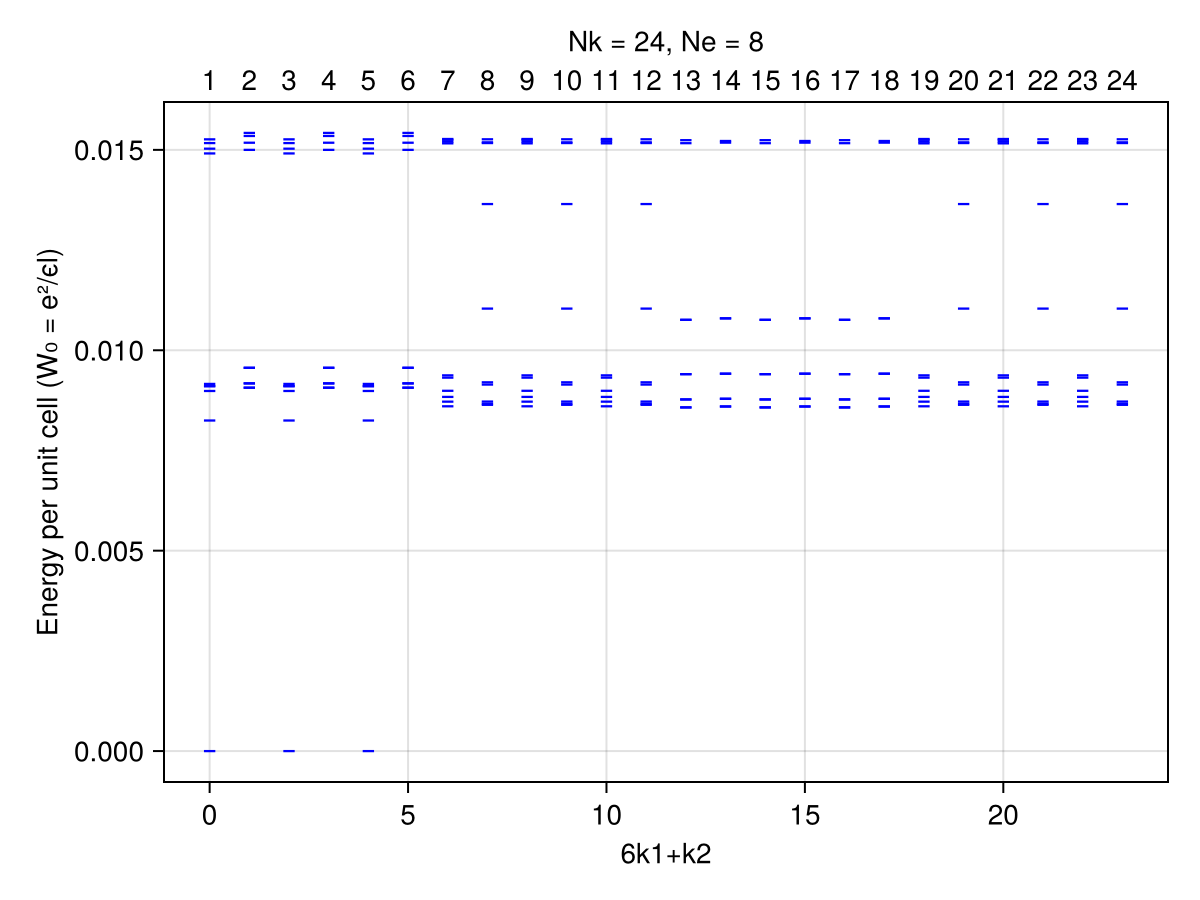

In [30]:
plot_ed_spectrum(energies, ss_k1, ss_k2,
    title = "Nk = $Nk, Ne = $Ne",
    # ylims = (0.372, 0.377),
);

In [31]:
# check energies explicitly to see degeneracy.

sn = 1 # the subspace number to inspect
println("total momentum: ", ss_k1[sn], "  ", ss_k2[sn])
energies[sn]/Nk/LLT.W0

total momentum: 0  0


10-element Vector{Float64}:
 1.5103433391881524e-16
 0.008248054229355713
 0.008984708149543405
 0.009105050304882565
 0.00910505030488261
 0.00916106377526345
 0.014911619577195898
 0.015030303041851184
 0.01516989397405571
 0.015263406205201452

Compute and plot one-body reduced density matrix

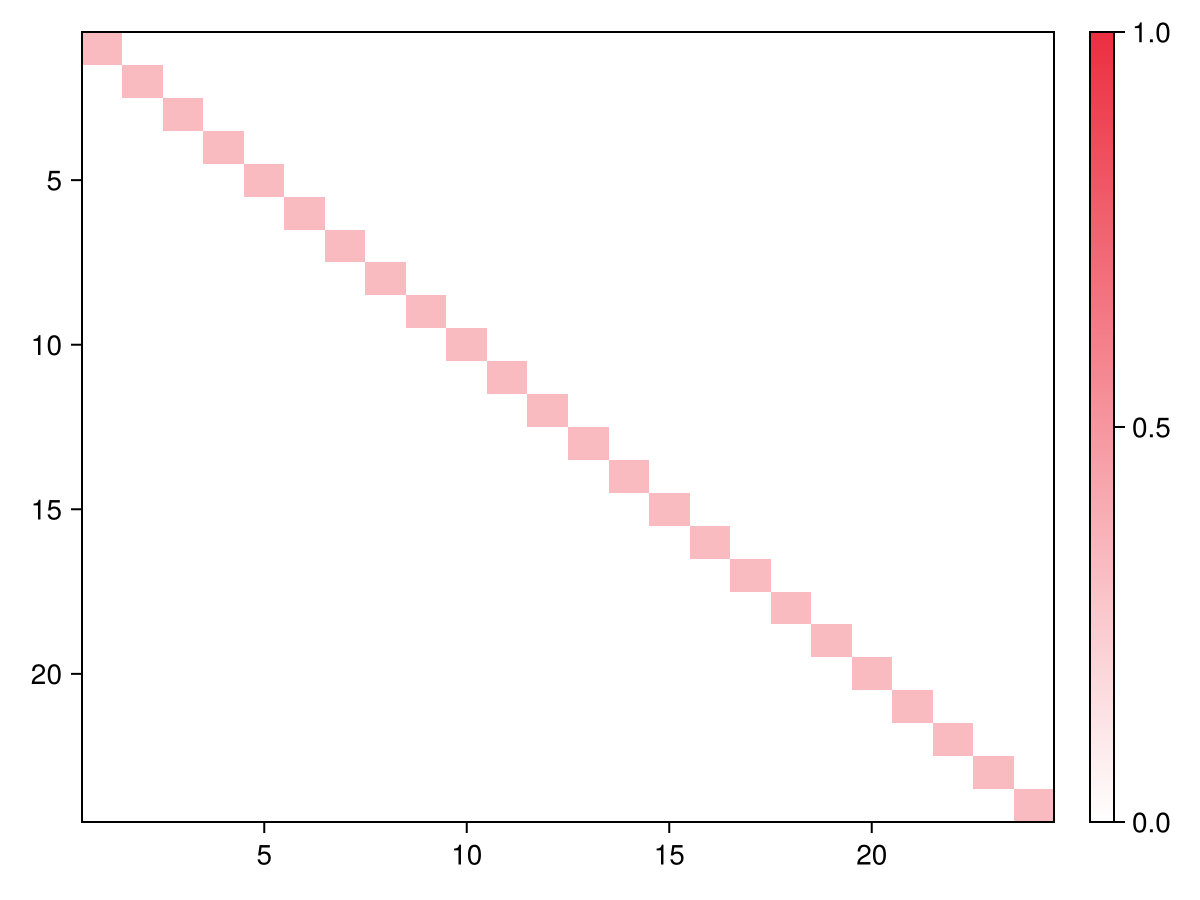

In [32]:
# plot the one-body reduced density matrix of the ground eigenstate in the first block
sn = 1
rdm1 = PES_1rdm(vectors[sn][1])                   # one state
# rdm1 = sum(i->PES_1rdm(vectors[sn][i]), 1:3)      # three degernerace states

fig, ax, hm = heatmap(abs.(rdm1); colorrange = (0,1), axis = (;yreversed = true),
    colormap = range(Makie.Colors.colorant"white", stop=Makie.Colors.colorant"#ec2f41", length=15)
)
Colorbar(fig[1, 2], hm); fig

# scatterlines(diag(rdm1) .|> abs)

Compute particle reduced density matrix and entanglement spectrum

In [40]:
NA = -1
ph_components = BitVector([NA < 0])
normalizer = binomial(ph_components[1] ? Nk-Ne : Ne, abs(NA))
# Create momentum blocks for part A (Hilbert subspace)
Ass, Ak1, Ak2 = ED_momentum_subspaces(para, (NA, ));

sn = 1
entanglement_spectrum = Vector{Vector{Float64}}(undef, length(Ass));
trace = 0.0; entropy = 0.0;
for i in eachindex(entanglement_spectrum)
    println("Processing subspace #$i with size $(length(Ass[i])), momentum $(Ak1[i]), $(Ak2[i])")
    rdm = PES_MomtBlock_rdm(para, vectors[sn][1], Ass[i], ph_components)
    # for x in 2:3
    #     rdm += PES_MomtBlock_rdm(para, vectors[sn][x], Ass[i], ph_components)
    # end
    vals = eigvals(rdm) ./ normalizer
    trace += sum(vals)
    nonzero_start = findfirst(>(1e-10), vals)
    isnothing(nonzero_start) || (entanglement_spectrum[i] = -log.(vals[nonzero_start:end]))
    isnothing(nonzero_start) || (entropy += sum(λ -> -λ*log(λ), vals[nonzero_start:end]))
end
entropy = (entropy + trace * log(trace)) / trace
@show trace, entropy;

Processing subspace #1 with size 1, momentum 0, 0
Processing subspace #2 with size 1, momentum 0, 1
Processing subspace #3 with size 1, momentum 0, 2
Processing subspace #4 with size 1, momentum 0, 3
Processing subspace #5 with size 1, momentum 0, 4
Processing subspace #6 with size 1, momentum 0, 5
Processing subspace #7 with size 1, momentum 1, 0
Processing subspace #8 with size 1, momentum 1, 1
Processing subspace #9 with size 1, momentum 1, 2
Processing subspace #10 with size 1, momentum 1, 3
Processing subspace #11 with size 1, momentum 1, 4
Processing subspace #12 with size 1, momentum 1, 5
Processing subspace #13 with size 1, momentum 2, 0
Processing subspace #14 with size 1, momentum 2, 1
Processing subspace #15 with size 1, momentum 2, 2
Processing subspace #16 with size 1, momentum 2, 3
Processing subspace #17 with size 1, momentum 2, 4
Processing subspace #18 with size 1, momentum 2, 5
Processing subspace #19 with size 1, momentum 3, 0
Processing subspace #20 with size 1, mom

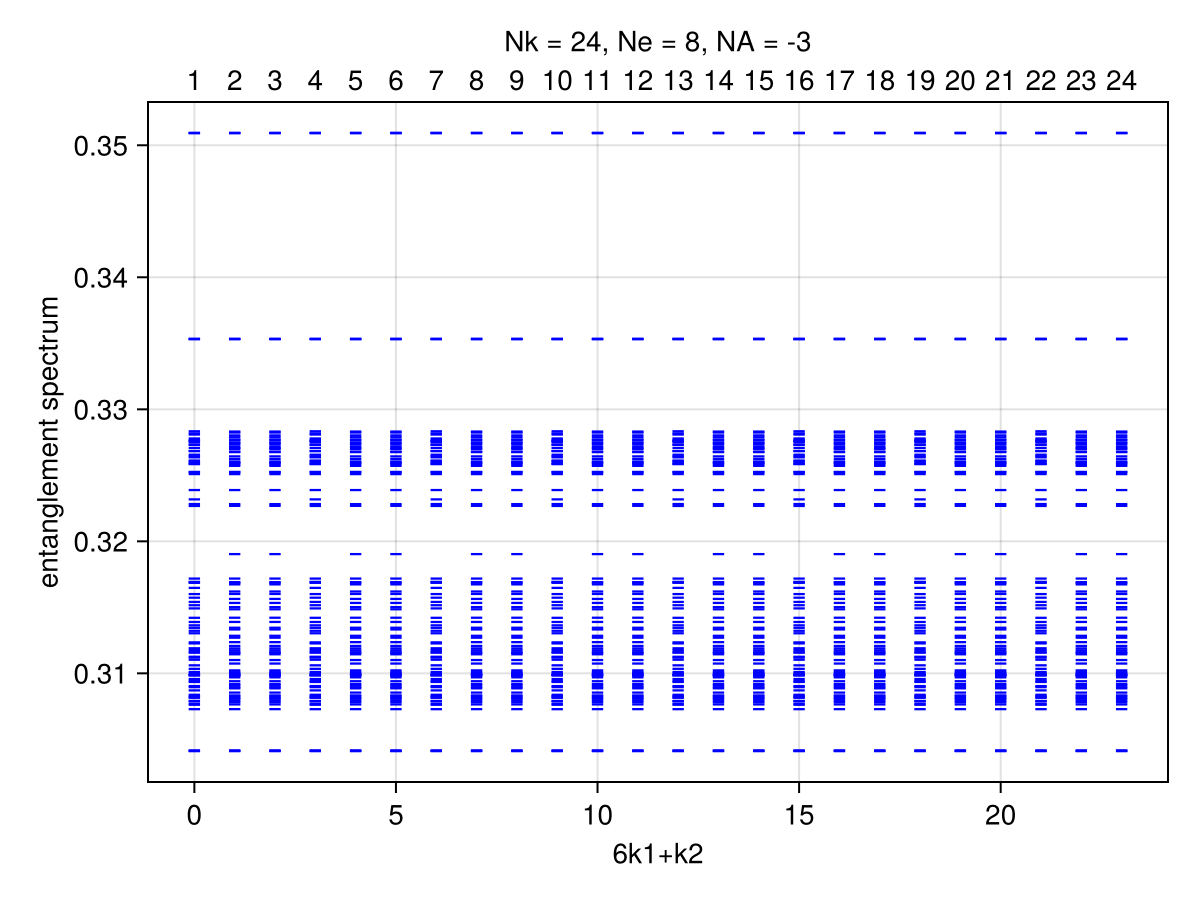

In [38]:
plot_ed_spectrum(entanglement_spectrum, Ak1, Ak2;
    ylabel = "entanglement spectrum",
    title = "Nk = $Nk, Ne = $Ne, NA = $NA",
);

Compute orbital reduced density matrix and entanglement spectrum

In [15]:
orbitals_A = collect(1:3:15)
subspacesA_list, subspacesB_list, momentumA_list, momentumB_list = 
    OES_NumMomtBlocks(para, orbitals_A, (Ne,));
display(momentumA_list);
@show(length.(subspacesA_list));
display(momentumB_list);
@show(length.(subspacesB_list));

6-element Vector{Vector{Tuple{Int64, Int64}}}:
 [(0, 0)]
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
 [(0, 0)]

6-element Vector{Vector{Tuple{Int64, Int64}}}:
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
 [(0, 0)]

length.(subspacesA_list) = [1, 5, 5, 5, 5, 1]
length.(subspacesB_list) = [15, 15, 15, 15, 10, 1]


In [16]:
sn = 1
vec = vectors[sn][1]; momentum = (ss_k1[sn], ss_k2[sn])
entanglement_spectrum = similar(momentumA_list, Vector{Vector{Float64}})
for i in eachindex(entanglement_spectrum)
    coefficient_matrices = OES_NumMomtBlock_coef(para, vec, momentum, 
        subspacesA_list[i], subspacesB_list[i], momentumA_list[i], momentumB_list[i]
    )
    density_matrices = similar(coefficient_matrices, Matrix{ComplexF64})
    for j in eachindex(density_matrices)
        density_matrices[j] = coefficient_matrices[j] * coefficient_matrices[j]'
    end
    # for x in 2:3
    #     coefficient_matrices = OES_NumMomtBlock_coef(para, vectors[sn][x], momentum, 
    #         subspacesA_list[i], subspacesB_list[i], momentumA_list[i], momentumB_list[i]
    #     )
    #     for j in eachindex(density_matrices)
    #         density_matrices[j] += coefficient_matrices[j] * coefficient_matrices[j]'
    #     end
    # end
    entanglement_spectrum[i] = similar(coefficient_matrices, Vector{Float64})
    for j in eachindex(density_matrices)
        vals = real.(eigvals(density_matrices[j]))
        nonzeroposition = findfirst(>(1e-7), vals)
        if isnothing(nonzeroposition)
            entanglement_spectrum[i][j] = [];
        else
            entanglement_spectrum[i][j] = -log.(vals[nonzeroposition:end])
        end
    end
end
entanglement_spectrum

6-element Vector{Vector{Vector{Float64}}}:
 [[14.57125035357482]]
 [[2.4410822426129575], [2.441082242612956], [2.4410822426129553], [2.4410822426129544], [2.441082242612952]]
 [[11.821399688547961, 8.775139092568445], [11.821399688547926, 8.77513909256846], [11.821399688547354, 8.775139092568429], [11.821399688548164, 8.775139092568482], [11.821399688547796, 8.775139092568457]]
 [[4.105181313743204, 2.5665027248495944], [4.105181313743199, 2.566502724849595], [4.105181313743216, 2.5665027248495886], [4.105181313743193, 2.5665027248495953], [4.105181313743216, 2.566502724849591]]
 [[], [], [], [], []]
 [[2.3288905388392047]]

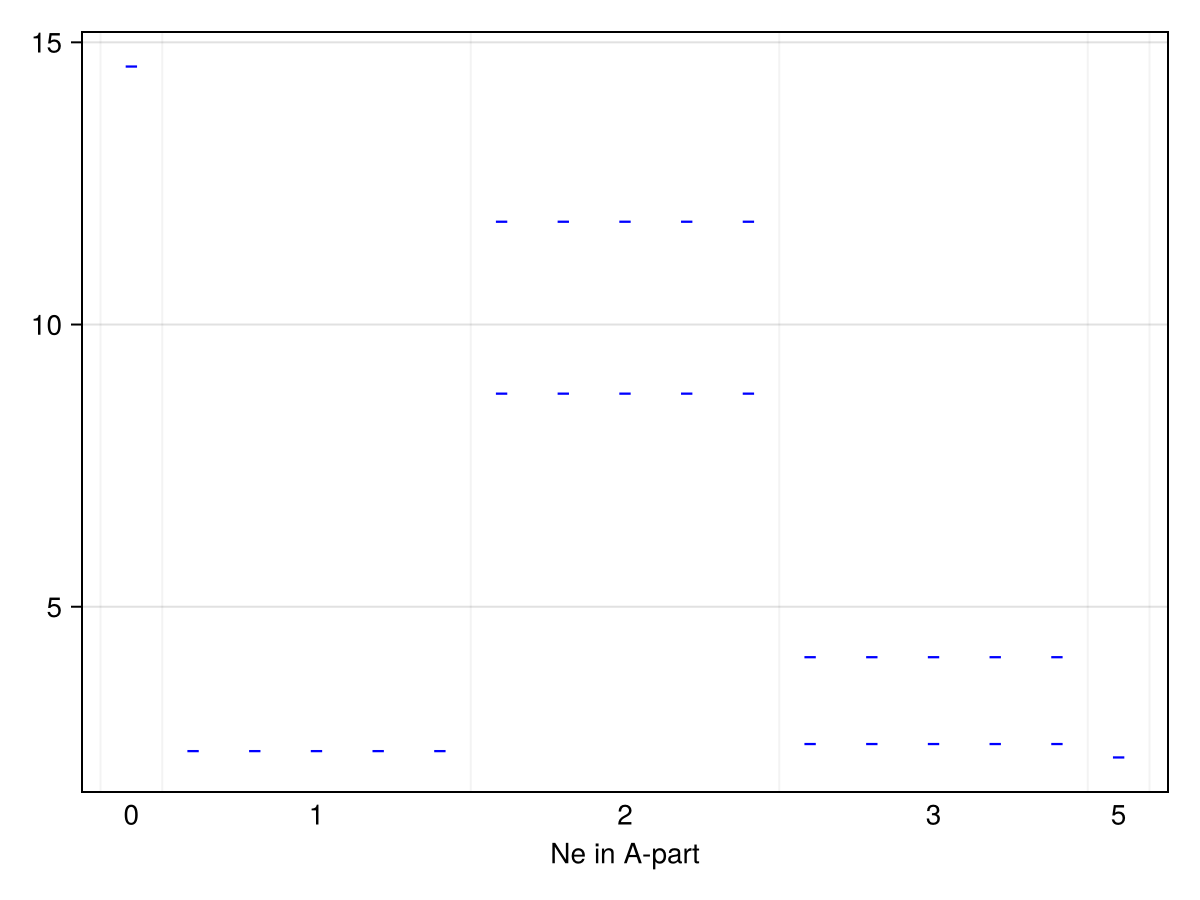

In [17]:
plot_entanglement_spectrum();

Compute the many-body connection and the Wilson loop for many-body Chern number.

In [18]:
para.FF_inf_angle = LLT.Landau_ff_inf(sys_int); # Update the form factor in the parameter

# FF_inf_angle can be added after building para. 
# However, assertion for function inputs and output is not triggered. 
# See example 2 for including FF_inf_angle during para initialization.

#Landau_ff_inf##0 (generic function with 2 methods)

In [19]:
# path for the Wilson loop integral on base manifold
# Landau level has uniform Berry curvature, so we compute Berry curvature of a small plaquate and then multiply plaquate number
N_shift = 10  # number of shifts along each edge
path = Tuple{Rational, Rational}[(0//1, 0//1)]
push!(path, (1//N_shift, 0//1))
push!(path, (1//N_shift, 1//N_shift))
push!(path, (0//1, 1//N_shift))
push!(path, (0//1, 0//1))
path

5-element Vector{Tuple{Rational, Rational}}:
 (0, 0)
 (1//10, 0)
 (1//10, 1//10)
 (0, 1//10)
 (0, 0)

In [20]:
# If the 3 ground states are in different momentum section, 
# we can track one of them and compute its many-body Chern number

#
sn = 1
psi_before = vectors[sn][1]
ED_connection_gaugefixing!(psi_before)  # fix global phase
psi_after = similar(psi_before)

WilsonLoopIntegral= Vector{Float64}(undef, 4)
for i in eachindex(WilsonLoopIntegral)

    println("path point #$i \t $(path[i+1])")

    scat_list = ED_sortedScatterList_twobody(para; kshift = path[i+1]);
    psi_after = EDsolve(subspaces[sn], scat_list; N = 6,
        showtime = false,
    )[2][1]
    ED_connection_gaugefixing!(psi_after)  # fix global phase

    WilsonLoopIntegral[i] = ED_connection_step( 
        psi_after, psi_before, float.(path[i+1]), float.(path[i]), para;
        wavefunction_tol = 1e-8, print_amp = true,
        amp_warn_tol = 0.7, amp_warn = true
    )

    psi_before = psi_after
end
ManyBodyChernNumber = sum(WilsonLoopIntegral) / (2π) * N_shift^2
#

path point #1 	 (1//10, 0//1)
Inner product: amp = 0.9999999999999996, phase = -0.10471975511967396
path point #2 	 (1//10, 1//10)
Inner product: amp = 0.9999999999999997, phase = 0.07330382858376826
path point #3 	 (0//1, 1//10)
Inner product: amp = 1.0000000000000002, phase = 0.1151917306316201
path point #4 	 (0//1, 0//1)
Inner product: amp = 0.9999999999999991, phase = -0.0628318530718018


0.3333333333330253

In [21]:
# If the 3 degenerate ground states are in the same total momentum section, 
# we can only compute the sum of the tatal connection and Chern number.

#=
sn = 4
psi_before = vectors[sn][1:3]
ED_connection_gaugefixing!(psi_before)

using LinearAlgebra
WilsonLoopIntegral= Vector{Float64}(undef, 4)
for i in eachindex(WilsonLoopIntegral)

    println("path point #$i \t $(path[i+1])")

    if path[i+1] == (0.0, 0.0)
        psi_after = vectors[sn][1:3]
        ED_connection_gaugefixing!(psi_after)
    else
        scat_list = ED_sortedScatterList_twobody(para; kshift = path[i+1]);
        psi_after = EDsolve(subspaces[sn], scat_list; N = 10,
            showtime = false, 
        )[2][1:3]
        ED_connection_gaugefixing!(psi_after)
    end

    WilsonLoopIntegral[i] = ED_connection_step(
        psi_after, psi_before, float.(path[i+1]), float.(path[i]), para;
        wavefunction_tol = 1e-8, print_amp = true,
        amp_warn_tol = 0.7, amp_warn = true
    )

    psi_before .= psi_after
end
ManyBodyChernNumber = sum(WilsonLoopIntegral) / (2π) * N_shift^2

=#